In [5]:
import sys,array
from ROOT import TFile, TCanvas
import root_numpy as rn
import numpy as np
import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.weight'] = 'bold'

In [18]:
stage = 'pi0' # singleshower'
name = '$\pi^0$'

stage = 'twoshower' # singleshower'
name = 'Two Shower'
color = 'g'

stage = 'singleshower'
name = 'Single Shower'

if stage == 'singleshower':
    color = 'b'

mc_pot = '4.23'

f_full = '/Volumes/UBooNEDataMCC8/MCC8_3/AnaFiles/MCBNBCos/MCVars_full.root'
f_sel2 = '/Volumes/UBooNEDataMCC8/MCC8_3/AnaFiles/MCBNBCos/MCVars_sel2.root'
f_pc = '/Volumes/UBooNEDataMCC8/MCC8_3/AnaFiles/MCBNBCos/MCVars_%s.root'%stage

a_full = rn.root2array(f_full,treename='pi0_tree')
a_sel2 = rn.root2array(f_sel2,treename='pi0_tree')
a_pc = rn.root2array(f_pc,treename='pi0_tree')

df_full = pd.DataFrame(a_full)
df_sel2 = pd.DataFrame(a_sel2)
df_pc = pd.DataFrame(a_pc)


In [19]:
df_full.head()
#print df_pc.shape

,true_pi0_e,true_angle,true_asym,reco_pi0_e,true_pi0_mom,true_gamma_e_min,true_gamma_e_max,true_RL_maxE,true_RL_minE,true_nu_e,true_mu_mom,true_mu_len,true_mu_theta,true_mu_phi,event
0,273.744049,1.295043,0.269005,-999.0,238.151642,58.028160,215.714218,7.883834,42.781746,0.560269,158.408997,23.878527,0.547286,1.917202,1088421888
1,357.316650,0.782436,0.759984,-999.0,330.840729,154.293442,203.021927,58.322735,28.268148,0.975245,568.282776,232.740570,0.850126,1.728735,1123024896
2,137.246094,2.911804,0.752910,-999.0,24.837254,58.948517,78.294228,16.186724,1.513271,1.607896,608.126465,405.649475,0.879929,2.157629,1123155968
3,683.899475,1.670539,0.018369,-999.0,670.446777,12.336008,671.562805,26.782768,77.277298,3.791714,676.433350,820.369324,1.117912,-0.154850,1131216896
4,499.382019,1.740438,0.033372,-999.0,480.793945,16.127254,483.253845,2.163449,0.495226,5.612069,3514.090576,1757.195190,0.275559,-0.904599,1132134400


In [20]:
test_full = df_full.query('true_gamma_e_min > 0')
print  float(test_full.shape[0])/df_full.shape[0]

0.985591539987


In [21]:
def makePlots(var,var_min,var_max,nbins=35,xlabel=''):

    mom_full, bin_full = np.histogram(df_full[var].values,bins=nbins,range=(var_min,var_max) )
    mom_sel2, bin_sel2 = np.histogram(df_sel2[var].values,bins=nbins,range=(var_min,var_max) )
    mom_pc, bin_pc = np.histogram(df_pc[var].values,bins=nbins,range=(var_min,var_max) )
    
    bins = (bin_full[:-1] + bin_full[1:])/2
    err_effx = 0.5 * (bins[1] - bins[0])
    err_full_y = np.sqrt(mom_full)
    err_sel2_y = np.sqrt(mom_sel2)
    err_pc_y = np.sqrt(mom_pc)

    # Efficiency
    sel2_eff = [float(mom_sel2[i])/mom_full[i] if mom_full[i] != 0. else 0. for i in xrange(len(mom_sel2))]
    pc_eff = [float(mom_pc[i])/mom_full[i] if mom_full[i] != 0. else 0. for i in xrange(len(mom_pc))]

    err_effsel2_y = [ sel2_eff[i] * math.sqrt(1./mom_sel2[i] + 1./mom_full[i]) \
            if mom_full[i] != 0. and sel2_eff[i] !=0 else 0. for i in xrange(len(bins))]

    err_effpc_y = [ pc_eff[i] * math.sqrt(1./mom_pc[i] + 1./mom_full[i]) \
            if mom_full[i] != 0. and pc_eff[i] !=0 else 0. for i in xrange(len(bins))]
        
    plt.figure(figsize=(8,6))
    plt.errorbar(bins,mom_full,yerr=err_full_y,xerr=err_effx,fmt='o',color='k',lw=3,label='All $\\nu_\mu$ CC 1$\pi^0$')
    plt.errorbar(bins,mom_sel2,yerr=err_sel2_y,xerr=err_effx,fmt='o',color='r',lw=3,label='SelectionII')
    plt.errorbar(bins,mom_pc,yerr=err_pc_y,xerr=err_effx,fmt='o',color=color,lw=3,label='%s Cuts' % name)
    plt.grid(True)
    #plt.title('True $\pi^0$ Momentum',fontsize=20,weight='bold') 
    plt.xlabel(xlabel,fontsize=20,weight='bold')
    plt.ylabel('Number of Events',fontsize=20,weight='bold')
    plt.legend(loc=0,fontsize=15) #loc='center left', bbox_to_anchor=(.5,0.5),fontsize=14)
    plt.xlim(var_min,var_max)
    plt.savefig('Plots/MCVar_%s_%s'%(stage,var))

    plt.figure(figsize=(8,6))
    plt.errorbar(bins,sel2_eff,yerr=err_effsel2_y,xerr=err_effx,fmt='o',color='r',lw=3,label='SelectionII')
    plt.errorbar(bins,pc_eff,yerr=err_effpc_y,xerr=err_effx,fmt='o',color=color,lw=3,label='%s Selection'%name)
    plt.grid(True)
    #plt.title('Efficiency vs True $\pi^0$ Momentum',fontsize=20,weight='bold')
    plt.xlabel(xlabel,fontsize=20,weight='bold')
    plt.ylabel('Efficiency',fontsize=20,weight='bold')
    #plt.legend(loc=0) #'center left', bbox_to_anchor=(0.3,0.8),fontsize=14)
    plt.ylim(0,1.)
    plt.xlim(var_min,var_max)
    #plt.savefig('Plots/MCVar_Pi0MomEff.png')
    plt.savefig('Plots/MCVar_eff_%s_%s'%(stage,var))
    

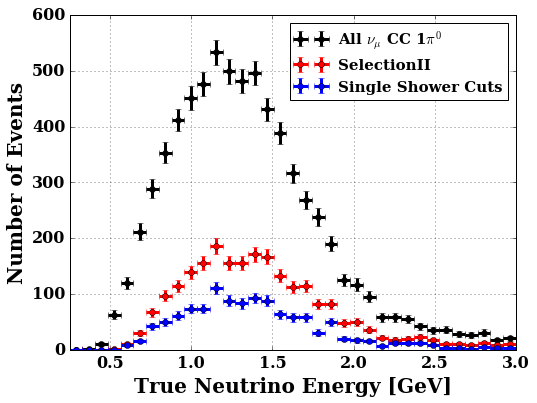

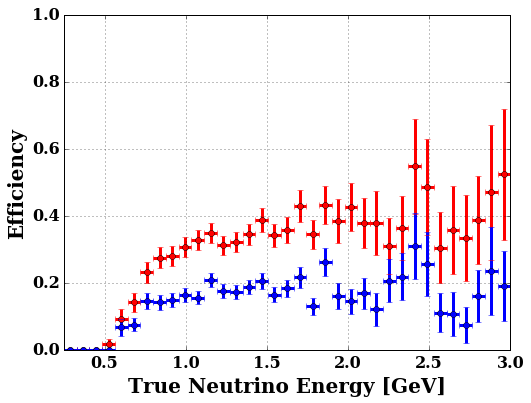

In [22]:
makePlots('true_nu_e',0.25,3.,xlabel='True Neutrino Energy [GeV]')


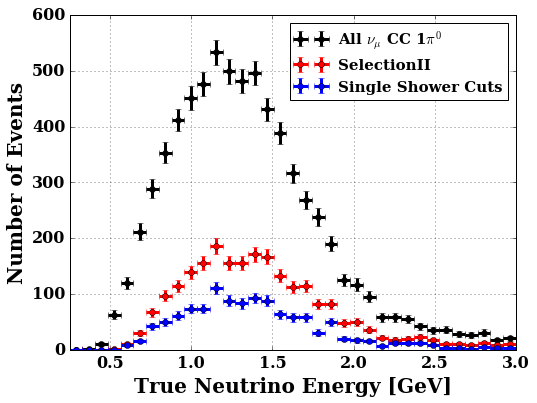

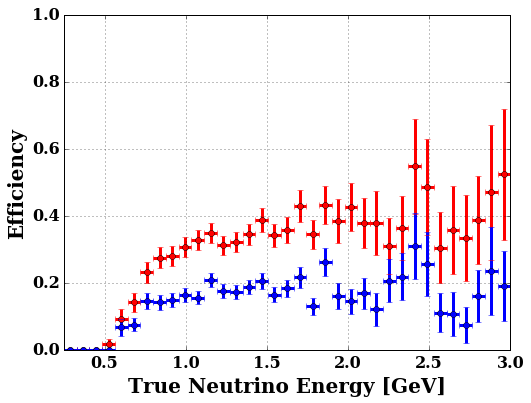

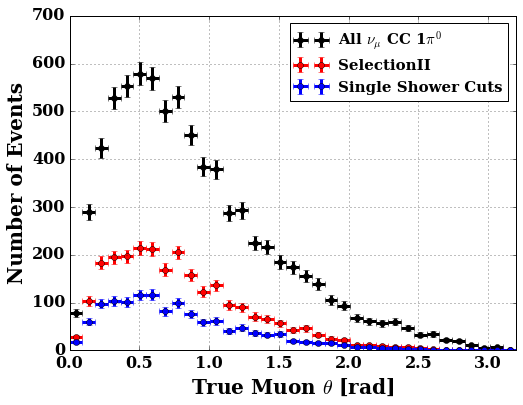

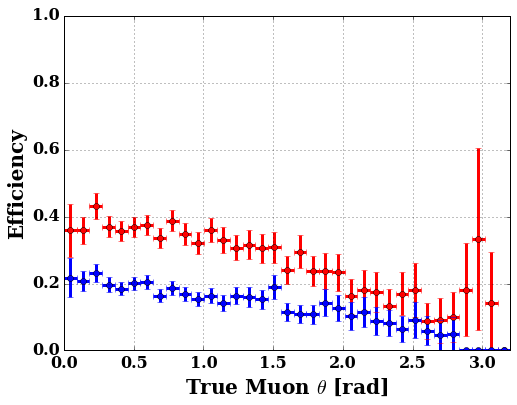

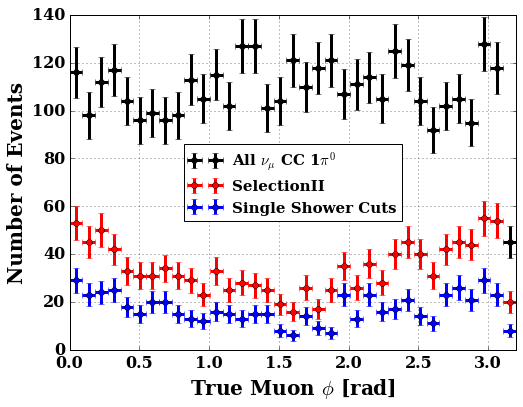

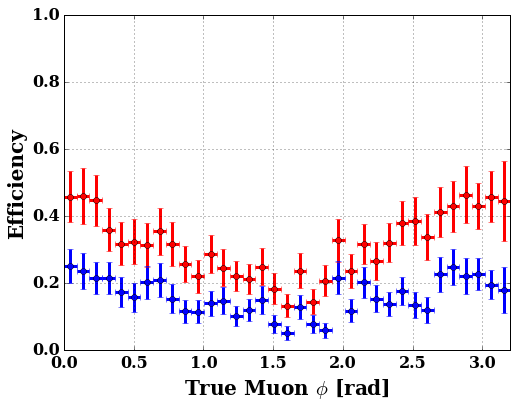

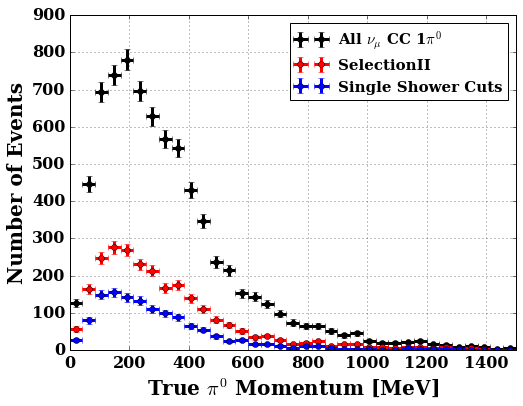

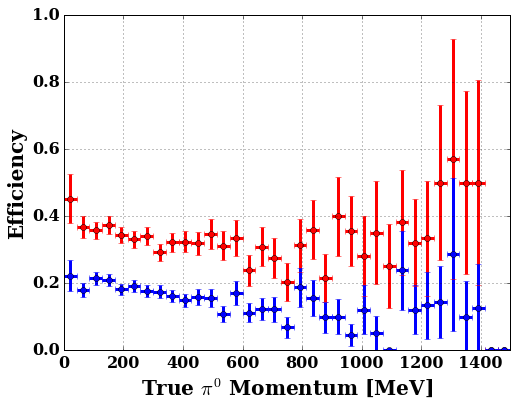

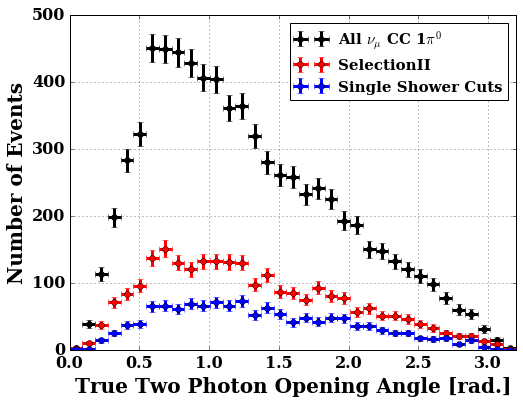

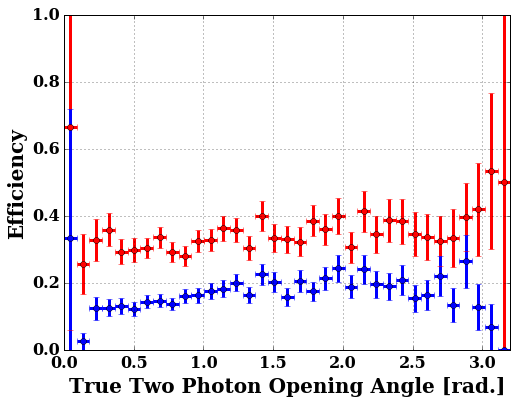

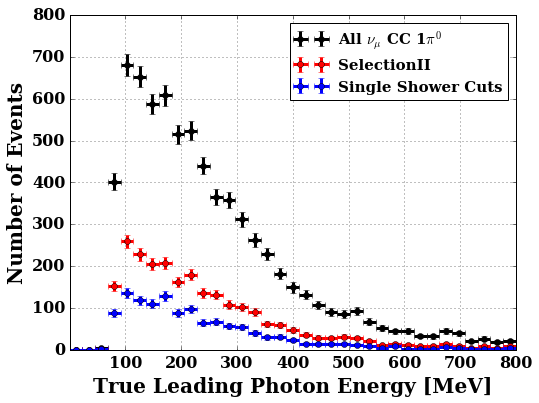

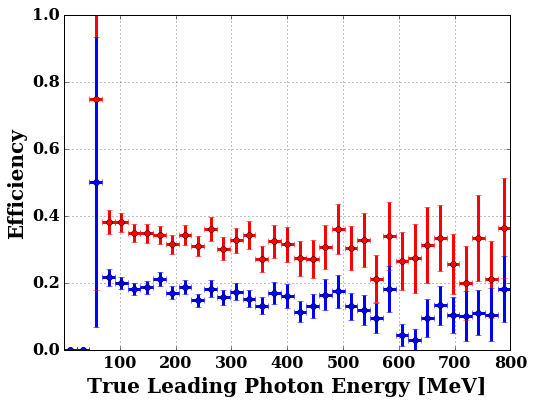

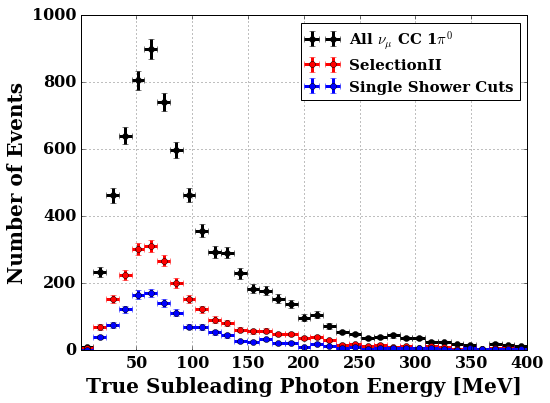

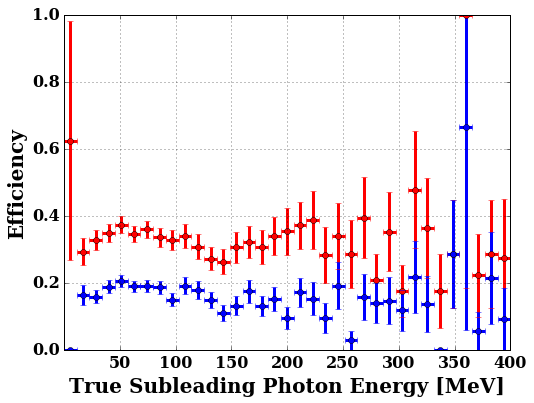

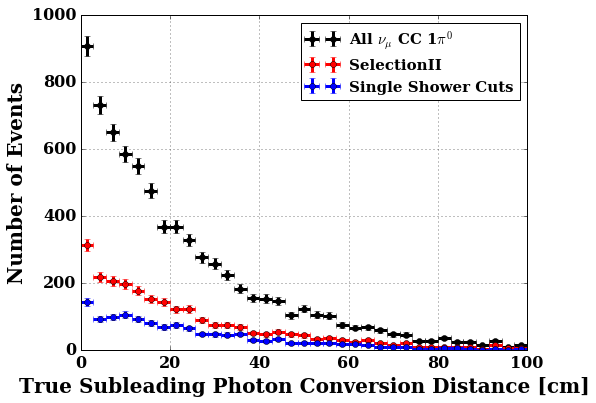

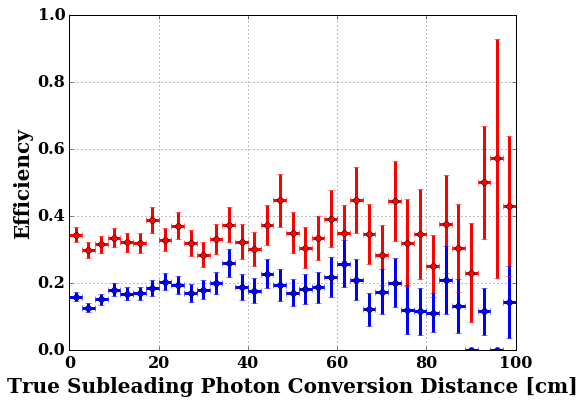

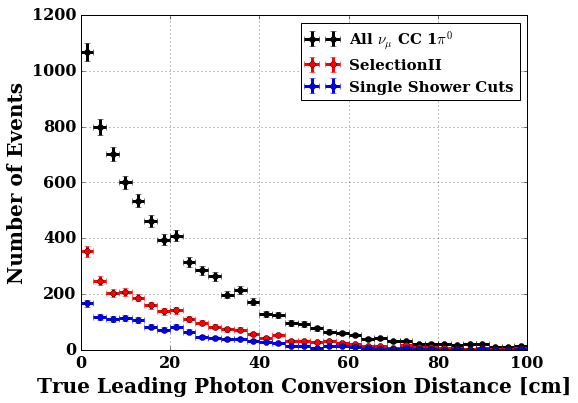

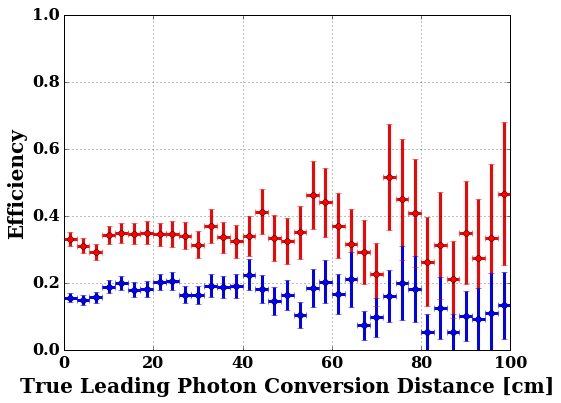

In [23]:
makePlots('true_nu_e',0.25,3.,xlabel='True Neutrino Energy [GeV]')
#makePlots('true_mu_mom',0,1500,xlabel='True $\mu$ Momentum [MeV]')
makePlots('true_mu_theta',0,3.2,xlabel='True Muon $\\theta$ [rad]')
makePlots('true_mu_phi',0,3.2,xlabel='True Muon $\\phi$ [rad]')
makePlots('true_pi0_mom',0,1500,xlabel='True $\\pi^0$ Momentum [MeV]')
makePlots('true_angle',0,3.2,xlabel='True Two Photon Opening Angle [rad.]')
makePlots('true_gamma_e_max',0.00001,800,xlabel='True Leading Photon Energy [MeV]')
makePlots('true_gamma_e_min',0.00001,400,xlabel='True Subleading Photon Energy [MeV]')
makePlots('true_RL_minE',0,100,xlabel='True Subleading Photon Conversion Distance [cm]')
makePlots('true_RL_maxE',0,100,xlabel='True Leading Photon Conversion Distance [cm]')

In [18]:
def makeNuEPlot(var,var_min,var_max,nbins=20,xlabel=''):

    mom_full, bin_full = np.histogram(df_full[var].values,bins=nbins,range=(var_min,var_max) )
    
    bins = (bin_full[:-1] + bin_full[1:])/2
    err_effx = 0.5 * (bins[1] - bins[0])
    err_full_y = np.sqrt(mom_full)

    plt.figure(figsize=(8,6))
    plt.errorbar(bins,mom_full,yerr=err_full_y,xerr=err_effx,fmt='o',color='k',lw=3,label='CC $\pi^0$')
    plt.grid(True)
    plt.xlabel(xlabel,fontsize=16,weight='bold')
    #plt.title('Signal CC$\pi^0$ in %sE20 MCBNB+Cosmic'%mc_pot,fontsize=18,weight='bold')
    plt.ylabel('Events',fontsize=16,weight='bold')
    #plt.yscale('log')
    plt.xscale('log')
    plt.xlim(var_min,var_max)
    #plt.axvline(0.275,lw=2,ls='--',c='r',label='$E_{\\nu}$ = 0.275')
    plt.legend(loc=0,numpoints=1) #loc='center left', bbox_to_anchor=(.5,0.5),fontsize=14)

    plt.savefig('Plots/MCVar_%s_OnlyNuE.png'%(stage))

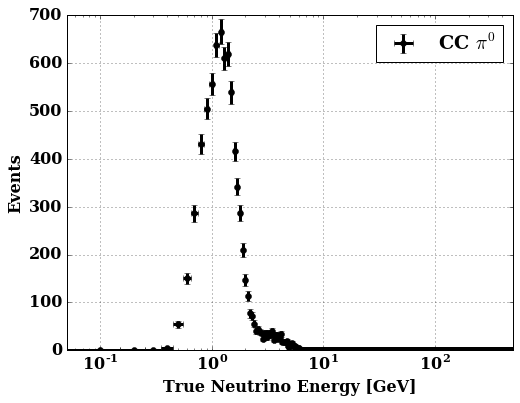

In [28]:
#makeNuEPlot('true_nu_e',0,7.,nbins=60,xlabel='True Neutrino Energy [GeV]')
makeNuEPlot('true_nu_e',0.05,500.,nbins=5000,xlabel='True Neutrino Energy [GeV]')


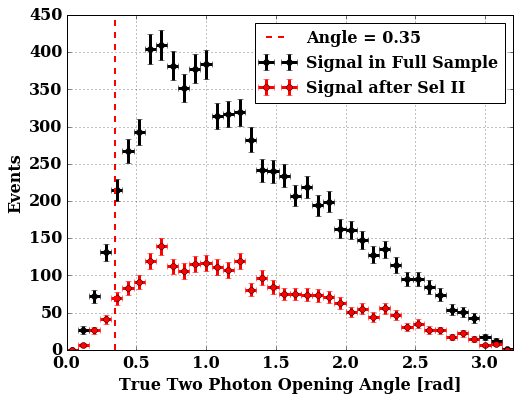

In [9]:
var_min =0
var_max = 3.2
nbins=40
xlabel='True Two Photon Opening Angle [rad]'

var = 'true_angle'
mom_full, bin_full = np.histogram(df_full[var].values,bins=nbins,range=(var_min,var_max) )

bins = (bin_full[:-1] + bin_full[1:])/2
err_effx = 0.5 * (bins[1] - bins[0])
err_full_y = np.sqrt(mom_full)

mom_sel2, bin_sel2 = np.histogram(df_sel2[var].values,bins=nbins,range=(var_min,var_max) )
err_sel2_y = np.sqrt(mom_sel2)

plt.figure(figsize=(8,6))
plt.errorbar(bins,mom_full,yerr=err_full_y,xerr=err_effx,fmt='o',color='k',lw=3,label='Signal in Full Sample')
plt.errorbar(bins,mom_sel2,yerr=err_sel2_y,xerr=err_effx,fmt='o',color='r',lw=3,label='Signal after Sel II')

plt.grid(True)
plt.xlabel(xlabel,fontsize=16,weight='bold')
#plt.title('Signal CC$\pi^0$ in 2.3e20 MCBNB+Cosmic',fontsize=18,weight='bold')
plt.ylabel('Events',fontsize=16,weight='bold')
#plt.yscale('log')
plt.xlim(var_min,var_max)
plt.axvline(0.35,lw=2,ls='--',c='r',label='Angle = 0.35')
plt.legend(loc=0,fontsize=16) #loc='center left', bbox_to_anchor=(.5,0.5),fontsize=14)

plt.savefig('Plots/MCVar_pi0_OnlyOangle.png')